# Multiple linear regression

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [22]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


In [23]:
#to summary the dataset
cdf.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


Text(0, 0.5, 'CO2 Emissions')

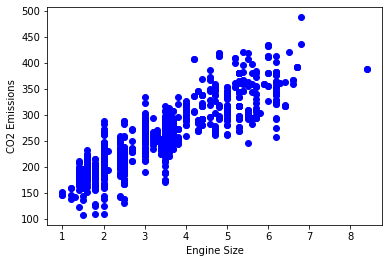

In [24]:
#plot CO2EMISSIONS vs ENGINESIZE
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

In [43]:
#Creating training and testing datasets: 80% training, 20% testing
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(msk)


[ True  True  True ...  True  True  True]


Train data distribution

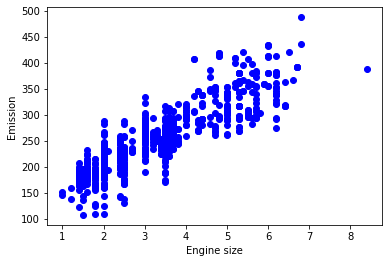

In [44]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [47]:
#Modeling Data
from sklearn import linear_model
regr = linear_model.LinearRegression()

#for training dataset
train_x = np.asanyarray(train[['ENGINESIZE',
                               'CYLINDERS',
                               'FUELCONSUMPTION_CITY',
                               'FUELCONSUMPTION_HWY',
                               'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#train model
regr.fit(train_x, train_y)

#Find coefficient and intercept
coef = regr.coef_
intercept = regr.intercept_
print("coefficient: ", coef)
print("Intercept: ", intercept)

coefficient:  [[10.6108135   7.33241933 -5.35093355 -6.28355074 21.1453951 ]]
Intercept:  [63.90127776]


## Prediction

In [51]:
#for testing dataset
test_x = np.asanyarray(test[['ENGINESIZE',
                             'CYLINDERS',
                             'FUELCONSUMPTION_CITY',
                             'FUELCONSUMPTION_HWY',
                             'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

y_hat = regr.predict(test[['ENGINESIZE',
                           'CYLINDERS',
                           'FUELCONSUMPTION_CITY',
                           'FUELCONSUMPTION_HWY',
                           'FUELCONSUMPTION_COMB']])

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - test_y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_x, test_y))




Residual sum of squares: 530.03
Variance score: 0.87


C:\Users\User\anaconda3\envs\cnn\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


**Explained variance regression score:**\
Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$\
The best possible score is 1.0, the lower values are worse.


## Other examples

In [59]:
#For training dataset 
train_x1 = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
train_y1 = np.asanyarray(train[['CO2EMISSIONS']])

#train model
regr1 = linear_model.LinearRegression()
regr1.fit(train_x1, train_y1)

#Get coefficients and intercept
coef_1 = regr1.coef_
intercept_1 = regr1.intercept_

print("Coefficients: ", coef_1)
print("Intercept: ", intercept_1)

Coefficients:  [[10.61705382  7.32531839  6.26210431  3.26401509]]
Intercept:  [63.92606434]


In [60]:
#Prediction
y_hat1 = regr1.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
test_x1 = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
test_y1 = np.asanyarray(test[['CO2EMISSIONS']])



#Calculate MSE
print("Residual sum of squares: %.2f" % np.mean((y_hat1 - test_y1)**2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr1.score(test_x1, test_y1))


Residual sum of squares: 530.85
Variance score: 0.87


C:\Users\User\anaconda3\envs\cnn\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
